In [1]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

In [2]:
from optimizers import ista_L1
from operators import Radon

dim = 100
num_theta = 90

phantom = ski.transform.resize(ski.data.shepp_logan_phantom(), (dim,dim))

theta = np.linspace(0,180, endpoint= False, num=num_theta)
R = Radon(theta=theta)
sinogram = R(phantom) + np.random.normal(loc = 0, scale= 0.01, size = [dim,num_theta])

ista = ista_L1(R, R.inv(sinogram), sinogram, t=0.1, lamda=1.0)
ista.solve()

Iteration: 1
Energy: inf
Iteration: 2
Energy: inf
Iteration: 3
Energy: inf
Iteration: 4
Energy: inf
Iteration: 5
Energy: inf
Iteration: 6
Energy: inf
Iteration: 7
Energy: inf
Iteration: 8
Energy: inf
Iteration: 9
Energy: inf
Iteration: 10
Energy: inf
Iteration: 11
Energy: inf


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
R(phantom).shape

(100, 90)

In [4]:
x_opt = ski.transform.resize(ski.data.shepp_logan_phantom(), (100,100))
theta = np.linspace(0,180, endpoint= False, num=100)

def radon(x):
    return ski.transform.radon(x, theta)/x.shape[-1]

def radon_adjoint(y):
    return ski.transform.iradon(y,theta,filter_name=None) / (y.shape[-2]*np.pi/(2 * len(theta)))

y = radon(x_opt) + np.random.normal(loc = 0, scale= 0.01, size = [100,100])
 


In [5]:
def soft_shrinkage(x, alpha):
    return np.maximum(np.abs(x)-alpha, 0)*np.sign(x)

def gradient_step(x, y, A, A_adjoint, t):
    grad = A_adjoint(A(x) - y)
    return x - 2*t*grad

def ista(y, A, A_adjoint, prox, t, lamda, iter):
    x = ski.transform.iradon(y*y.shape[-2])

    for i in range(iter):#
        e = np.linalg.norm(A(x)-y)**2 + lamda*np.linalg.norm(x, ord=1)
        print('Iteration ' + str(i) + ', Energy: ' + str(e))
        lin_up = gradient_step(x, y, A, A_adjoint, t)
        x = prox(lin_up, lamda*t)
        
    return x


In [6]:
approx = []
for lamda in range(20):
    approx.append(ista(y, radon, radon_adjoint, soft_shrinkage, t=0.0003, lamda = lamda, iter = 50))


Iteration 0, Energy: 0.636647577184109
Iteration 1, Energy: 0.6366452129838176
Iteration 2, Energy: 0.636642849275507
Iteration 3, Energy: 0.6366404860587236
Iteration 4, Energy: 0.6366381233330151
Iteration 5, Energy: 0.6366357610979284
Iteration 6, Energy: 0.6366333993530119
Iteration 7, Energy: 0.6366310380978141
Iteration 8, Energy: 0.6366286773318842
Iteration 9, Energy: 0.6366263170547708
Iteration 10, Energy: 0.6366239572660243
Iteration 11, Energy: 0.636621597965195
Iteration 12, Energy: 0.6366192391518336
Iteration 13, Energy: 0.6366168808254915
Iteration 14, Energy: 0.6366145229857199
Iteration 15, Energy: 0.6366121656320716
Iteration 16, Energy: 0.6366098087640987
Iteration 17, Energy: 0.6366074523813545
Iteration 18, Energy: 0.6366050964833921
Iteration 19, Energy: 0.6366027410697661
Iteration 20, Energy: 0.6366003861400306
Iteration 21, Energy: 0.6365980316937401
Iteration 22, Energy: 0.6365956777304509
Iteration 23, Energy: 0.6365933242497179
Iteration 24, Energy: 0.63659

In [7]:
def plot_lamda(idx):
    
    fig = plt.figure()
    plt.imshow(approx[idx])


slider = widgets.IntSlider(min = 0, max = 19, step = 1, value = 0, continuous_update = True)
interactive_plot = interactive(plot_lamda, idx = slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='idx', max=19), Output()), _dom_classes=('widget-interact…

TypeError: Invalid shape (20, 100, 100) for image data

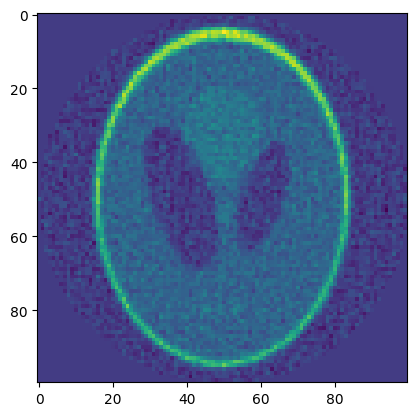

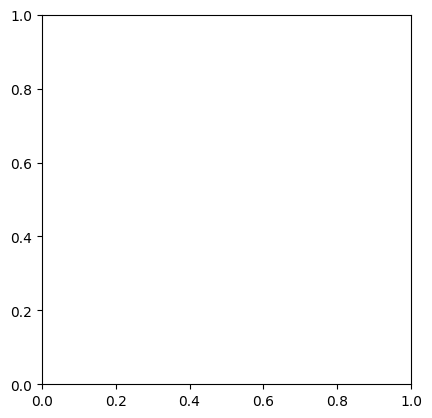

In [8]:
plt.imshow(ski.transform.iradon(y,theta))
plt.figure()
plt.imshow(approx)

In [ ]:
alpha = 3
x = np.linspace(-10,10,num=100)
prox_x = soft_shrinkage(x, alpha)
plt.plot(x, prox_x)